In [ ]:
# Description: This program uses the Dual Moving Average Crossover to determine when to enter and exit positions

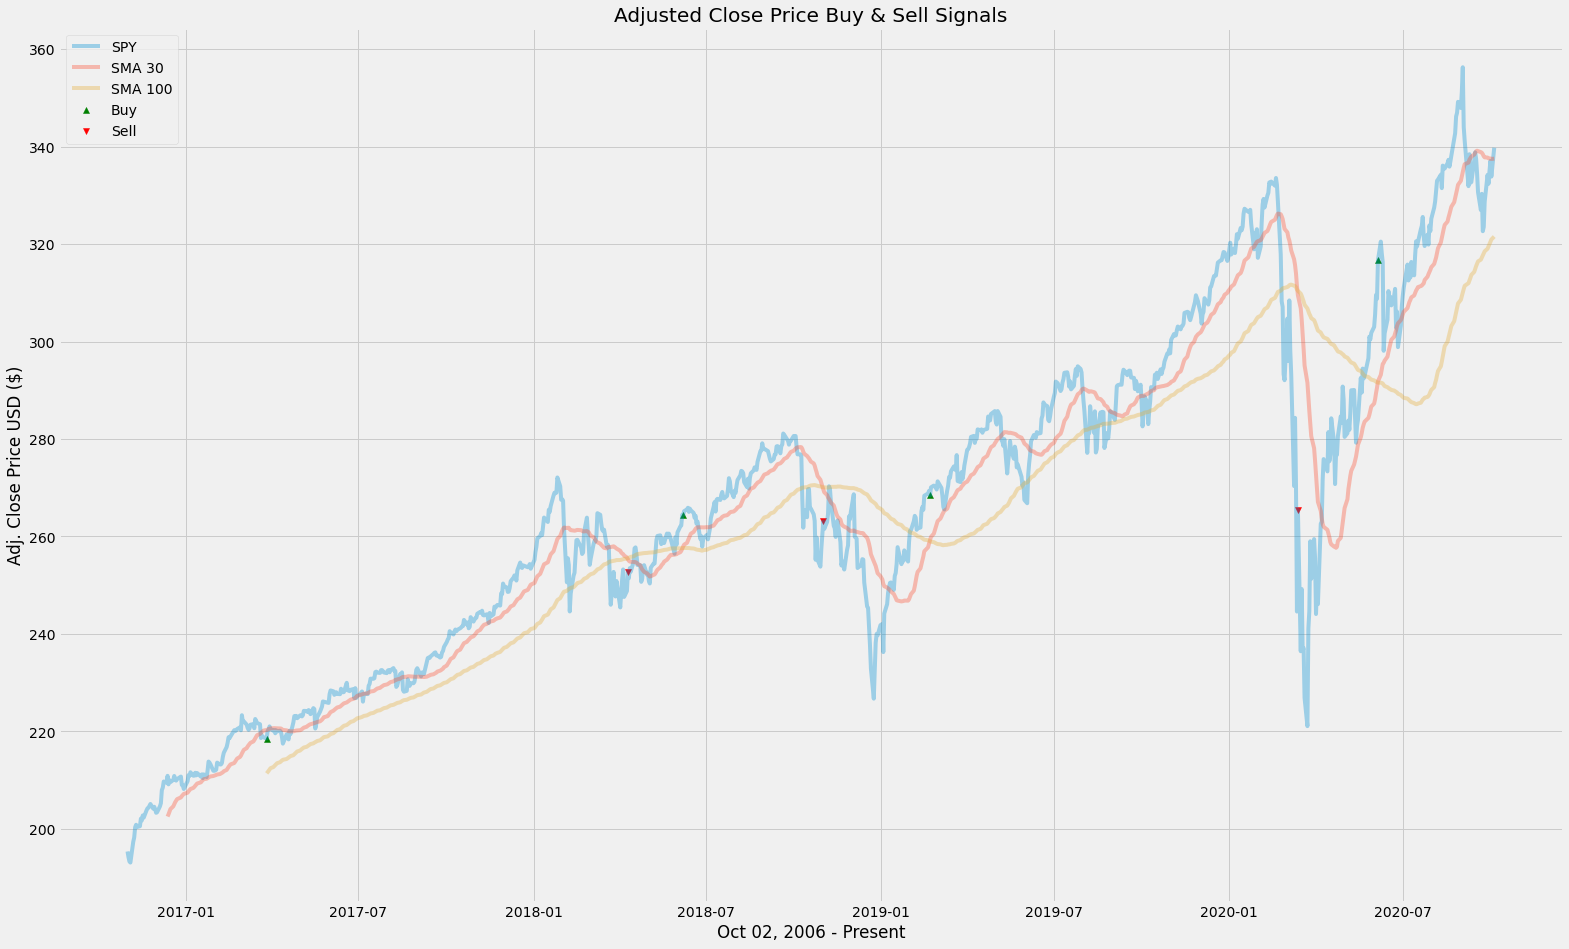

In [1]:
# Import the libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ticker = 'SPY'

# Load the data
stock = web.DataReader(ticker, 'yahoo', start='2016-11-01')

# Create the SMA w/ 30 day window
SMA_30 = pd.DataFrame()
SMA_30['Adj Close Price'] = stock['Adj Close'].rolling(window=30).mean()

# Create the SMA w/ 100 day window
SMA_100 = pd.DataFrame()
SMA_100['Adj Close Price'] = stock['Adj Close'].rolling(window=100).mean()

# Create a new DataFrame to store all the data
data = pd.DataFrame()
data[ticker] = stock['Adj Close']
data['SMA 30'] = SMA_30['Adj Close Price']
data['SMA 100'] = SMA_100['Adj Close Price']

# Create funciton to signal when to enter and exit positions
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA 30'][i] > data['SMA 100'][i]:
      if flag != 1:
        sigPriceBuy.append(data[ticker][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA 30'][i] < data['SMA 100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data[ticker][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

# Store the buy and sell data into a variable
bs = buy_sell(data)
data['Buy_Signal_Price'] = bs[0]
data['Sell_Signal_Price'] = bs[1]
data.index = pd.to_datetime(data.index)

# Visualize the data to enter and exit positions
plt.figure(figsize=(24.0,15.0))
plt.plot(data[ticker], label=ticker, alpha=0.35)
plt.plot(data['SMA 30'], label='SMA 30', alpha=0.35)
plt.plot(data['SMA 100'], label='SMA 100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Adjusted Close Price Buy & Sell Signals')
plt.xlabel('Oct 02, 2006 - Present')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()